# Theme Model

In [413]:
import json
import numpy  as np
import pandas as pd
from glob import glob 
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [414]:
df = pd.read_pickle("strong_data_finaltidy.pickle")

In [416]:
df.tail()

,article_index,content,title,time,author,articles_no_author,from,author_identity,author_enroll_time,word_sentence_list,seg,date
54981,8139,"@@? 4月份反彈不少, 小人持有南非幣計價的,都漲回正值, 連剛買的復華短收都有賺.當...",Re: 四月後轉換南非幣基金，但都是漲不太起來或虧損...,2020-05-08 23:34:00,michelle,"""82""",NaN,註冊會員,"""2017-04-06 12:04""","[""@@? , 4月份, 反彈, 不少, ,, , 小人, 持有, 南非幣, 計價, ...","[""@@? , 4月份, 反彈, 不少, , 小人, 持有, 南非幣, 計價, 漲回,...",2020-05-08
54982,8139,南非幣真的很兇猛的哦，雖然配息很爽，但最好要有當成本金大幅虧損的心理準備,Re: 四月後轉換南非幣基金，但都是漲不太起來或虧損...,2020-05-09 02:29:00,莫大華,"""104""",NaN,註冊會員,"""2017-09-26 10:01""","["", 南非幣, 真的, 很, 兇猛, 的, 哦, ，, 雖然, 配息, 很, 爽, ，, ...","["", 南非幣, 真的, 兇猛, 配息, 爽, 最好, 當成, 本金, 大幅, 虧損, 心理...",2020-05-09
54983,8139,這是我買的南非幣基金要怎麼配置比較好呢我現在是要買股基還是債基呢謝謝,Re: 四月後轉換南非幣基金，但都是漲不太起來或虧損...,2020-05-09 10:38:00,sly72927,"""5""",NaN,註冊會員,"""2020-04-09 11:36""","["", 這, 是, 我, 買, 的, 南非幣, 基金, 要, 怎麼, 配置, 比較, 好, ...","["", 買, 南非幣, 基金, 配置, 比較, 現在, 買, 股基, 債基, 謝謝, ""]",2020-05-09
54984,8139,部分原因應該是匯損造成另外所述基金蠻複雜的，蕭碧燕老師有說要了解自己買的基金，蠻有道理的,Re: 四月後轉換南非幣基金，但都是漲不太起來或虧損...,2020-05-09 11:20:00,yangyensan,"""87""",NaN,註冊會員,"""2019-04-09 16:44""","["", 部分, 原因, 應該, 是, 匯損, 造成, 另外, 所, 述, 基金, 蠻, 複雜...","["", 部分, 原因, 應該, 匯損, 造成, 述, 基金, 蠻, 複雜, 蕭碧燕, 老師,...",2020-05-09
54985,8140,小弟弟是26歲的社會新...工作幾年也不算新鮮人了...今天上班偶然跟客人聊到了儲蓄，阿姨很...,Re: 從被騙賠光存款，更加碼負債的狀態重新出發，邁向財富自由,2020-05-09 02:59:00,Ninegee,"""2""",NaN,新註冊會員,"""2020-05-09 02:12""","["", 小, 弟弟, 是, 26, 歲, 的, 社會, 新, ., ., ., 工作, 幾,...","["", 弟弟, 26, 歲, 社會, 新, ., ., ., 工作, 年, 算, 新鮮人, ...",2020-05-09


In [418]:
a = df.groupby('date').count().content



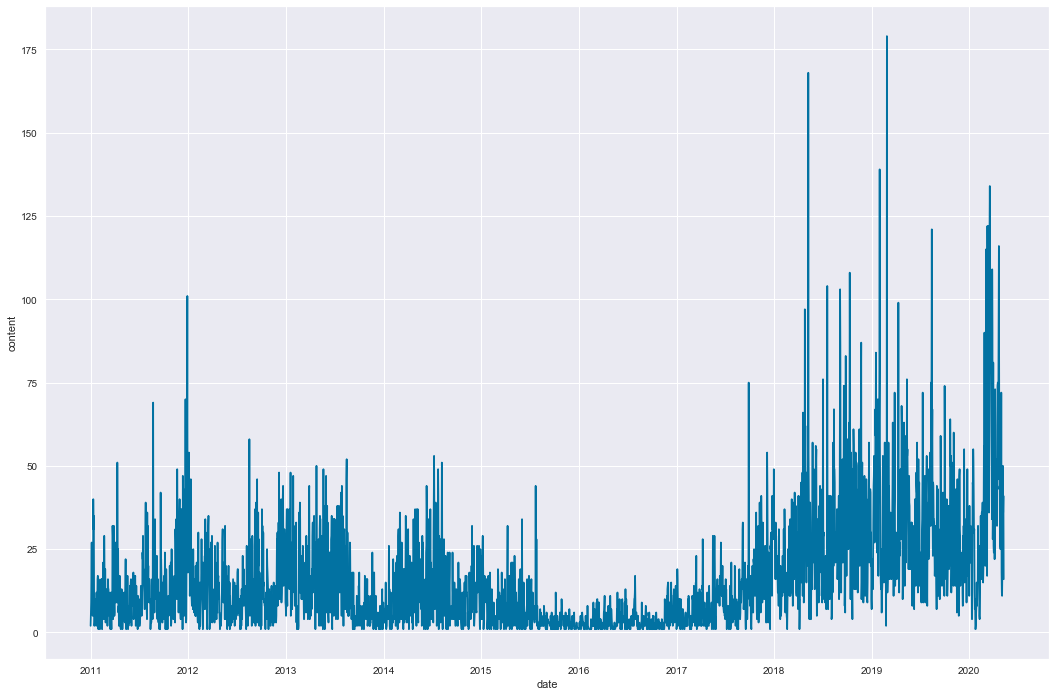

In [425]:
sns.set_style('darkgrid')

fig,ax = plt.subplots(figsize=(18,12))
sns.lineplot(x=a.index, y=a)

In [429]:
a.describe()


count    3235.000000
mean       16.997218
std        17.228887
min         1.000000
25%         5.000000
50%        12.000000
75%        24.000000
max       179.000000
Name: content, dtype: float64

In [36]:
y_global_eqt = pd.read_csv('redemp_data/nomura_redemp_global.csv')
y_taiwan_eqt = pd.read_csv('redemp_data/nomura_redemp_taiwan.csv')
y_total = pd.read_csv('redemp_data/nomura_redemp_total.csv')

# 併入時間dataframe

In [37]:
from pandas.tseries.offsets import MonthEnd
df['date'] = pd.to_datetime(df['date'])
df['EndOfMonth'] = pd.to_datetime(df['date'], format="%Y%m") + MonthEnd(1)
# df.head()

0     2014-11-30
1     2014-12-31
2     2015-01-31
3     2015-02-28
4     2015-03-31
         ...    
60    2019-11-30
61    2019-12-31
62    2020-01-31
63    2020-02-29
64    2020-03-31
Name: ym, Length: 65, dtype: object

# 合併選完的Y

In [55]:
def reg_data(data, label_data):
    data['EndOfMonth'] = pd.to_datetime(data['EndOfMonth']).apply(lambda x:x.date())
    label_data['ym'] = pd.to_datetime(label_data['ym']).apply(lambda x:x.date())
    res = data.merge(label_data,   left_on='EndOfMonth',right_on='ym')

    return res

In [57]:
data_global = reg_data(df, y_global_eqt)
data_tw = reg_data(df, y_taiwan_eqt)
data_total = reg_data(df, y_total)

# data_tw.head()

# EDA

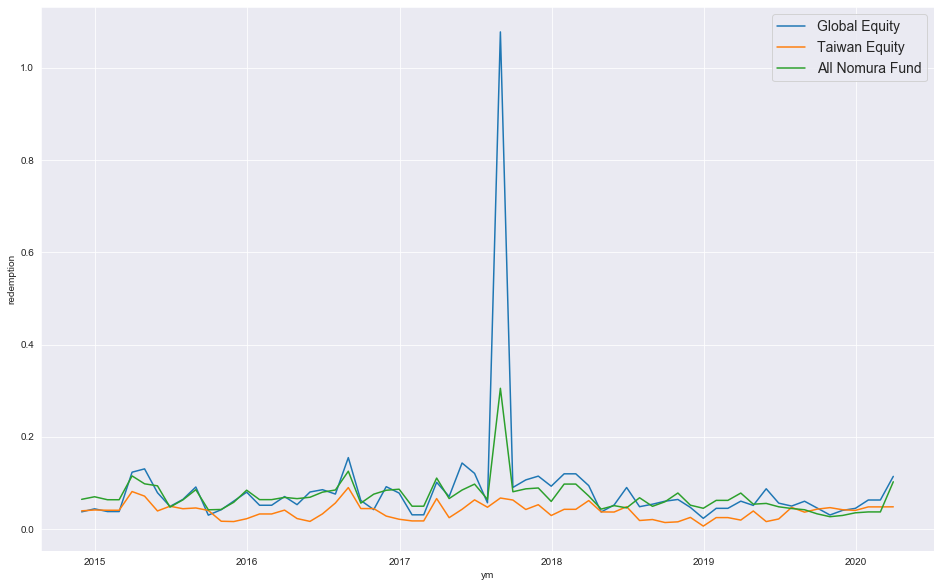

In [66]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(16,10))
sns.lineplot(x='ym', y='redemption', data= y_global_eqt)
sns.lineplot(x='ym', y='redemption', data= y_taiwan_eqt)
sns.lineplot(x='ym', y='redemption', data= y_total)
ax.legend(['Global Equity', 'Taiwan Equity', "All Nomura Fund"], fontsize=14)


# 讀取清洗完的資料

In [431]:
# sns.set_style("darkgrid")

df = data_global.copy()
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft JhengHei']})


In [69]:
df.head(3)

,article_index,content,title,time,author,articles_no_author,from,author_identity,author_enroll_time,word_sentence_list,seg,date,EndOfMonth,ym,redemption,delta,signal
0,177,11:00 新台幣貶2.82角 報32.0元兌1美元鉅亨網新聞中心 2015-01-05 ...,Re: 關於匯率避險,2015-01-05 11:58:00,baonamy,"""823""",NaN,名人堂成員,"""2011-01-16 23:00""","["", 11:00, , 新台幣, 貶, 2.82, 角, , 報, 32.0, 元, ...","["", 11:00, , 新台幣, 貶, 2.82, 角, , 報, 32.0, 元, ...",2015-01-05,2015-01-31,2015-01-31,0.038173,-0.005886,False
1,177,有位單筆操作比我厲害好幾倍的大大問我對上証走勢的看法家庭主婦不敢拿水果刀當大刀耍倒是有個圖意...,Re: 關於匯率避險,2015-01-15 23:35:00,Ivy,"""2373""",NaN,名人堂成員,"""2012-10-08 19:52""","["", 有, 位, 單, 筆, 操作, 比, 我, 厲害, 好幾, 倍, 的, 大大, 問,...","["", 位, 單, 筆, 操作, 厲害, 好幾, 倍, 大大, 問, 上証, 走勢, 看法,...",2015-01-15,2015-01-31,2015-01-31,0.038173,-0.005886,False
2,177,不知道匯率目前該存啥比較好 現在還是主要存美元 等歐元看真ㄉ有沒有1:1以下可以撿(簡單又保...,Re: 關於匯率避險,2015-01-16 06:01:00,apple,"""81""",NaN,註冊會員,"""2012-04-02 22:40""","["", 不, 知道, 匯率, 目前, 該, 存, 啥, 比較, 好, , 現在, 還是, ...","["", 知道, 匯率, 目前, 存, 比較, , 現在, 主要, 存, 美元, , 歐元...",2015-01-16,2015-01-31,2015-01-31,0.038173,-0.005886,False


# 每日發文人數

Text(0.5, 1.0, '全會員每日發文量 vs 贖回率(Taiwan)上升')

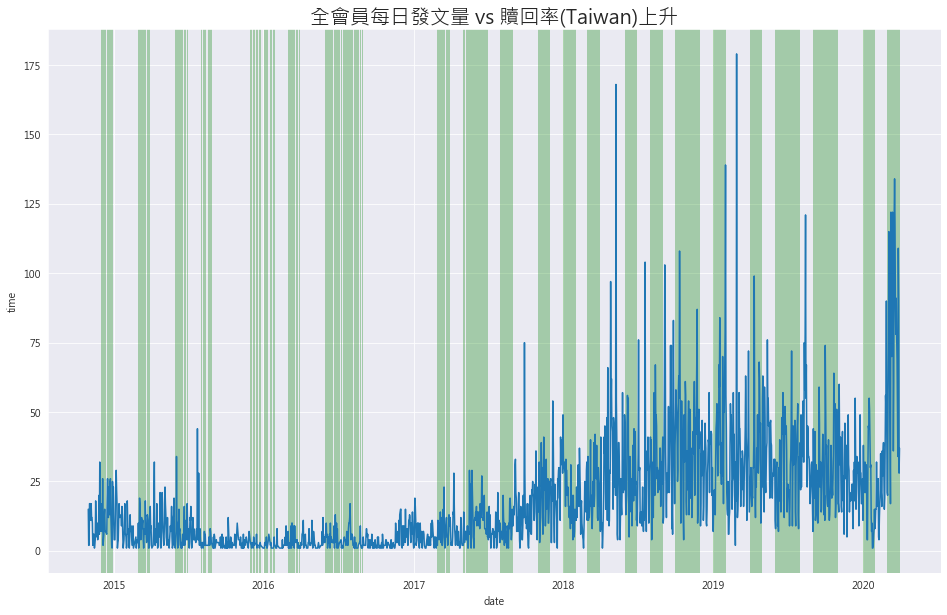

In [87]:
# taiwan
df = data_tw.copy()

plot_data1 = df[ (df['signal']==False) ]
plot_data2 = df[(df['signal']==True) ]

plot_data1=pd.concat([plot_data1, plot_data2])

plot_s1 =plot_data1.groupby('date').count()['time']
plot_s2 =plot_data2.groupby('date').count()['time']

fig, ax = plt.subplots(figsize=(16,10))

sns.lineplot(x=plot_s1.index, y=plot_s1)
# sns.lineplot(x=plot_s2.index, y=plot_s2, color='red')
for i in plot_s2.index:
    ax.axvspan(i,i +pd.Timedelta ("1d"),  facecolor='green', edgecolor='none', alpha=.3)

ax.set_title("全會員每日發文量 vs 贖回率(Taiwan)上升", fontsize=20)

In [70]:
plot_data1 = df[ (df['author_identity']=="名人堂成員") & (df['signal']==False) ]
plot_data2 = df[ (df['author_identity']=="名人堂成員") & (df['signal']==True) ]

plot_data1=pd.concat([plot_data1, plot_data2])

In [139]:
# plot_data1 = df1[  (df1['signal']==False) ]
# plot_data2 = df1[ (df1['signal']==True) ]

# plot_data1=pd.concat([plot_data1, plot_data2])

In [71]:
plot_s1 =plot_data1.groupby('date').count()['time']
plot_s2 =plot_data2.groupby('date').count()['time']

Text(0.5, 1.0, '名人堂會員每日發文量 vs 贖回率(Global)上升')

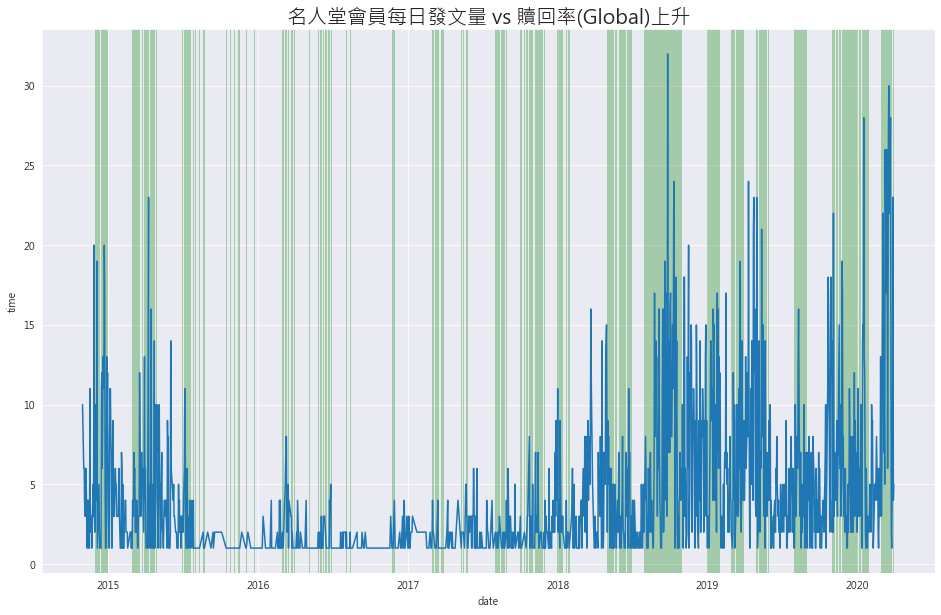

In [74]:
fig, ax = plt.subplots(figsize=(16,10))

sns.lineplot(x=plot_s1.index, y=plot_s1)
# sns.lineplot(x=plot_s2.index, y=plot_s2, color='red')
for i in plot_s2.index:
    ax.axvspan(i,i +pd.Timedelta ("1d"),  facecolor='green', edgecolor='none', alpha=.3)

ax.set_title("名人堂會員每日發文量 vs 贖回率(Global)上升", fontsize=20)

Text(0.5, 1.0, '名人堂會員每日發文量 vs 贖回率(Taiwan)上升')

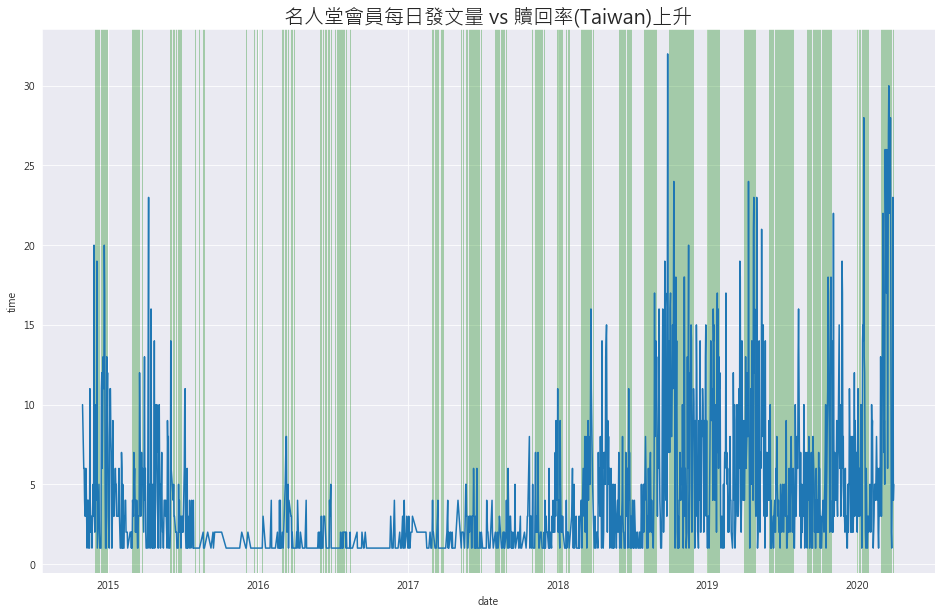

In [75]:
# taiwan
df = data_tw.copy()

plot_data1 = df[ (df['author_identity']=="名人堂成員") & (df['signal']==False) ]
plot_data2 = df[ (df['author_identity']=="名人堂成員") & (df['signal']==True) ]

plot_data1=pd.concat([plot_data1, plot_data2])

plot_s1 =plot_data1.groupby('date').count()['time']
plot_s2 =plot_data2.groupby('date').count()['time']

fig, ax = plt.subplots(figsize=(16,10))

sns.lineplot(x=plot_s1.index, y=plot_s1)
# sns.lineplot(x=plot_s2.index, y=plot_s2, color='red')
for i in plot_s2.index:
    ax.axvspan(i,i +pd.Timedelta ("1d"),  facecolor='green', edgecolor='none', alpha=.3)

ax.set_title("名人堂會員每日發文量 vs 贖回率(Taiwan)上升", fontsize=20)

Text(0.5, 1.0, '名人堂會員每日發文量 vs 贖回率(Total)上升')

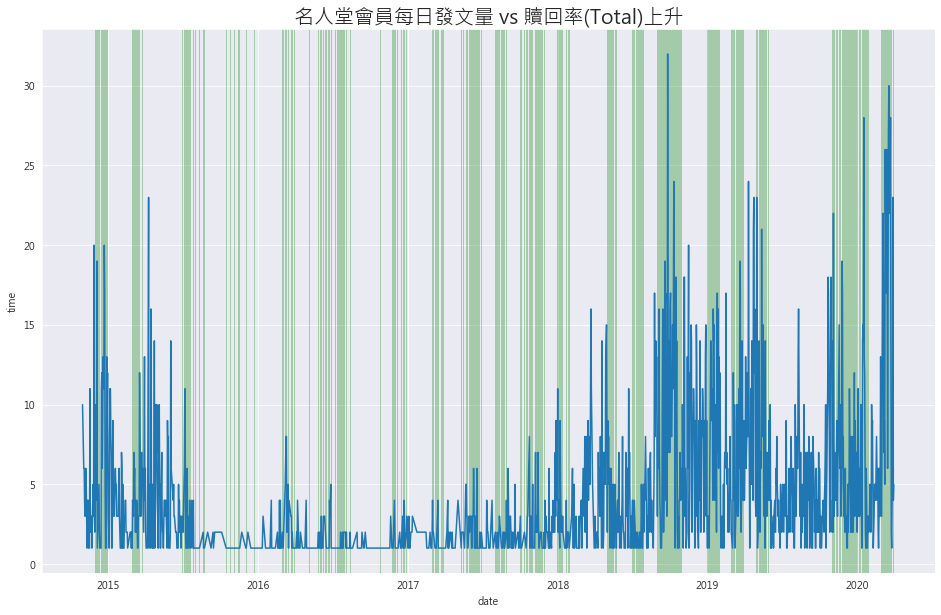

In [76]:
# taiwan
df = data_total.copy()

plot_data1 = df[ (df['author_identity']=="名人堂成員") & (df['signal']==False) ]
plot_data2 = df[ (df['author_identity']=="名人堂成員") & (df['signal']==True) ]

plot_data1=pd.concat([plot_data1, plot_data2])

plot_s1 =plot_data1.groupby('date').count()['time']
plot_s2 =plot_data2.groupby('date').count()['time']

fig, ax = plt.subplots(figsize=(16,10))

sns.lineplot(x=plot_s1.index, y=plot_s1)
# sns.lineplot(x=plot_s2.index, y=plot_s2, color='red')
for i in plot_s2.index:
    ax.axvspan(i,i +pd.Timedelta ("1d"),  facecolor='green', edgecolor='none', alpha=.3)

ax.set_title("名人堂會員每日發文量 vs 贖回率(Total)上升", fontsize=20)

# 最終資料-名人+管理員-且限定台灣

Text(0.5, 1.0, '名人堂+管理員每日發文量 vs 贖回率(Taiwan)上升')

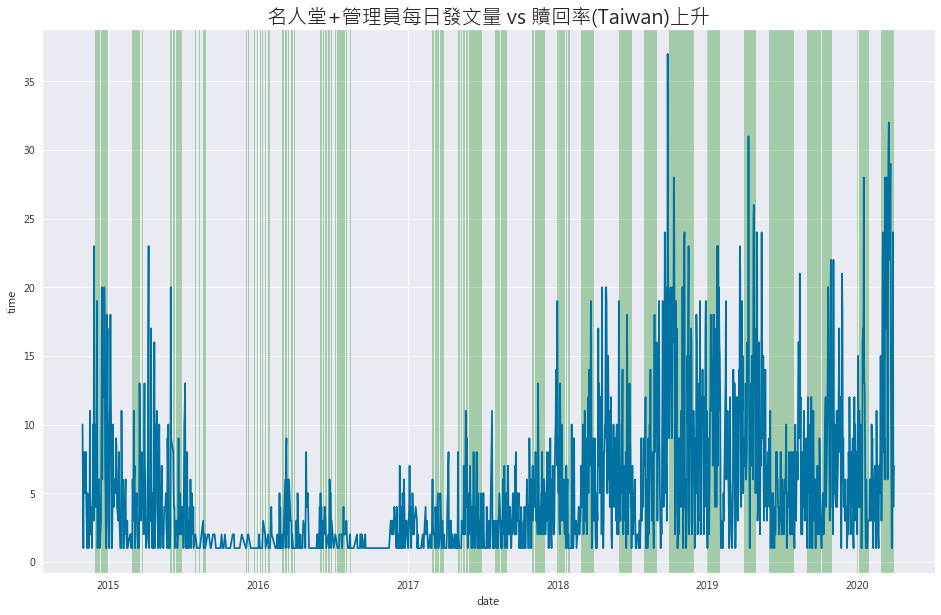

In [434]:
# taiwan
df = data_tw.copy()
df = df[(df.author_identity=="名人堂成員") | (df.author_identity=='管理員')]

plot_data1 = df[ (df['signal']==False) ]
plot_data2 = df[ (df['signal']==True) ]

plot_data1=pd.concat([plot_data1, plot_data2])

plot_s1 =plot_data1.groupby('date').count()['time']
plot_s2 =plot_data2.groupby('date').count()['time']

fig, ax = plt.subplots(figsize=(16,10))

sns.lineplot(x=plot_s1.index, y=plot_s1)
# sns.lineplot(x=plot_s2.index, y=plot_s2, color='red')
for i in plot_s2.index:
    ax.axvspan(i,i +pd.Timedelta ("1d"),  facecolor='green', edgecolor='none', alpha=.3)

ax.set_title("名人堂+管理員每日發文量 vs 贖回率(Taiwan)上升", fontsize=20)

Text(0.5, 1.0, '名人堂+管理員每日發文量 vs 贖回率(Total)上升')

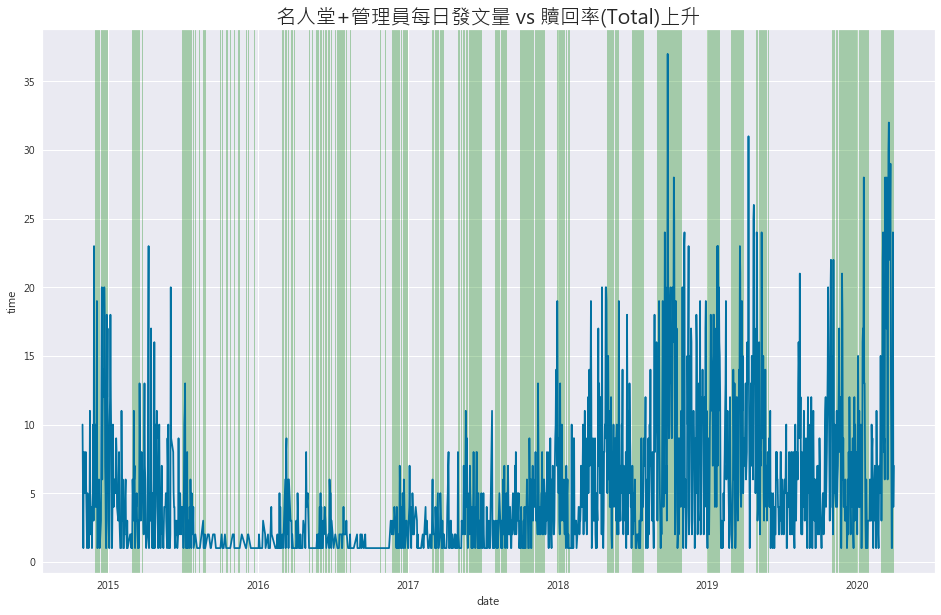

In [433]:
# taiwan
df = data_total.copy()
df = df[(df.author_identity=="名人堂成員") | (df.author_identity=='管理員')]

plot_data1 = df[ (df['signal']==False) ]
plot_data2 = df[ (df['signal']==True) ]

plot_data1=pd.concat([plot_data1, plot_data2])

plot_s1 =plot_data1.groupby('date').count()['time']
plot_s2 =plot_data2.groupby('date').count()['time']

fig, ax = plt.subplots(figsize=(16,10))

sns.lineplot(x=plot_s1.index, y=plot_s1)
# sns.lineplot(x=plot_s2.index, y=plot_s2, color='red')
for i in plot_s2.index:
    ax.axvspan(i,i +pd.Timedelta ("1d"),  facecolor='green', edgecolor='none', alpha=.3)

ax.set_title("名人堂+管理員每日發文量 vs 贖回率(Total)上升", fontsize=20)

In [437]:
df.groupby('signal').count()['content']

signal
False    4270
True     4609
Name: content, dtype: int64

# 統計詞數

#### 比例檢定方法

In [304]:
data = df.copy()
sub_data = data[['seg','signal']]

In [305]:
sub_data

,seg,signal
0,"["", 11:00, , 新台幣, 貶, 2.82, 角, , 報, 32.0, 元, ...",False
1,"["", 位, 單, 筆, 操作, 厲害, 好幾, 倍, 大大, 問, 上証, 走勢, 看法,...",False
3,"["", 感謝, ivy, 姐, 回覆, 匯率, KD, 中線, 準備, 看升, 短線, 準備...",False
4,"[""sorry, 沒, 注意到, 回, 個人, 看法, 上證, 機會, 受惠, 年前, 逆,...",False
5,"["", 美聯儲, 升息, 不遠, 立場, 改, http://news, .cnyes, ....",False
...,...,...
34222,"["", 投資, 最終, 目的, 賺錢, 先決, 條件, 低買, 高賣, 相對, 低點, 買,...",True
34223,"["", 或許, 強, 基金, 討論, 主題, 效率, 會, 越來越, 差, 有感而發, ,...",True
34225,"["", 布魯斯, 老哥, 建議, 說, 無妨, ""]",True
34226,"["", 其實, 沒, 事, 大概, 個人, 習慣, 問題, 建立, 討論, 未, 清楚, 明...",True


In [306]:
def find_key_word_table(sub_data, top_range=80, top_select=20):
    pos_dict = dict()
    neg_dict = dict()
    
    for seg, signal in zip(sub_data['seg'], sub_data['signal']):
        if signal==True:
            for word in seg:
                if word in pos_dict:
                    pos_dict[word] += 1
                else:
                    pos_dict[word] = 1 
        if signal==False:
            for word in seg:
                if word in neg_dict:
                    neg_dict[word] += 1
                else:
                    neg_dict[word] = 1 
    
    pos_words  = pd.Series(pos_dict,index=pos_dict.keys())
    neg_words  = pd.Series(neg_dict,index=neg_dict.keys())
    
    test_pos=[]
    for i in pos_words.sort_values(ascending=False).index[:top_range]:
        test_pos.append(i)
        
    test_neg=[]
    for i in neg_words.sort_values(ascending=False).index[:top_range]:
        test_neg.append(i)
        
    pos_words = [i  for i in test_pos[:top_select] if i not in test_neg]
    neg_words = [i  for i in test_neg[:top_select] if i not in test_pos]
    selected_words = pos_words+neg_words
    selected_words = list(filter(lambda word: '\n' not  in word, selected_words))
    selected_words = list(filter(lambda word: '0' not  in word, selected_words))
    
    reg_data = pd.DataFrame()

    for i in selected_words:
        df = sub_data['seg'].apply(lambda x: i in x)
        df = df.rename(i)
        reg_data = pd.concat([reg_data, df], axis=1)
        
    reg_data=pd.concat([reg_data, sub_data['signal']] , axis=1)
    reg_data['signal'] = reg_data['signal'].astype(int)
    
    return reg_data

In [307]:
# data = df[df['author']=='hito21']
# find_key_word_table(data)

In [308]:
pos_dict = dict()
neg_dict = dict()

In [309]:
pos_signal=0
neg_signal=0

for seg, signal in zip(sub_data['seg'], sub_data['signal']):
    if signal==True:
        pos_signal = pos_signal+1
        
        for word in seg:
            if word in pos_dict:
                pos_dict[word] += 1
                break
            else:
                pos_dict[word] = 1 
    if signal==False:
        neg_signal = neg_signal+1
        
        for word in seg:
            if word in neg_dict:
                neg_dict[word] += 1
                break
            else:
                neg_dict[word] = 1 

In [310]:
pos_words  = pd.Series(pos_dict,index=pos_dict.keys())
pos_words = pos_words.rename('pos_words')
neg_words  = pd.Series(neg_dict,index=neg_dict.keys())
neg_words = neg_words.rename('neg_words')

In [311]:
worddata = pd.concat([pos_words, neg_words], axis=1)
worddata

,pos_words,neg_words
"""",4180.0,3887.0
紐元,2.0,NaN
下跌,3.0,2.0
加減,1.0,NaN
買,3.0,3.0
...,...,...
散戶,NaN,1.0
"""20191223",NaN,1.0
成,NaN,1.0
"""10%",NaN,1.0


In [312]:
print(pos_signal)
print(neg_signal)

4609
4270


In [313]:
worddata= worddata.fillna(0)
worddata

,pos_words,neg_words
"""",4180.0,3887.0
紐元,2.0,0.0
下跌,3.0,2.0
加減,1.0,0.0
買,3.0,3.0
...,...,...
散戶,0.0,1.0
"""20191223",0.0,1.0
成,0.0,1.0
"""10%",0.0,1.0


In [314]:
worddata.pos_words =  worddata.pos_words / pos_signal
worddata.neg_words =  worddata.neg_words / neg_signal

In [315]:
worddata['pos_delta'] = worddata.pos_words - worddata.neg_words

In [316]:
pos_words = worddata.sort_values("pos_delta")[:30].index

In [317]:
neg_words = worddata.sort_values("pos_delta", ascending=False)[:30].index

# T檢定方法

In [ ]:
from scipy import stats

In [354]:
# data = df.copy()
# sub_data = data[['seg','signal']]

In [355]:
t_ratio=[]
pvalue=[]
for i in worddata.index:
    pos=[]
    neg=[]
    for seg, signal in zip(sub_data['seg'], sub_data['signal']):
        if signal==True:
            count_pos=0
            for word in seg:
                if word == i:
                    count_pos += 1
            pos.append(count_pos)

        if signal==False:
            count_neg=0
    
            for word in seg:
                if word ==i:
                    count_neg+= 1
            neg.append(count_neg)
    ratio, pval = stats.ttest_ind(pos, neg)
    t_ratio.append(ratio)
    pvalue.append(pval)

In [356]:
worddata_ttest = worddata.copy()
worddata_ttest['t-ratio']=t_ratio
worddata_ttest['p-value']=pvalue

worddata_ttest = worddata_ttest.drop(['pos_words', 'neg_words', 'pos_delta'], axis=1)

,t-ratio,p-value
"""",-0.699659,0.484158
紐元,0.962518,0.335816
下跌,-0.885811,0.375743
加減,1.070610,0.284374
買,0.502422,0.615383
...,...,...
散戶,-0.688124,0.491393
"""20191223",-1.038942,0.298860
成,-1.100237,0.271259
"""10%",-1.038942,0.298860


In [362]:
worddata_ttest['abs_tratio'] = abs(worddata_ttest['t-ratio'])

In [438]:
keyindex=worddata_ttest.sort_values('abs_tratio', ascending=False)[:80]
keyindex

,t-ratio,p-value,abs_tratio
關稅,-5.239830,1.644165e-07,5.239830
白宮,-4.408803,1.051665e-05,4.408803
盤,-4.312124,1.634414e-05,4.312124
"\""",4.301901,1.711526e-05,4.301901
買入,4.200072,2.694381e-05,4.200072
...,...,...,...
政府,-2.377752,1.743957e-02,2.377752
10%,2.374410,1.759814e-02,2.374410
"""\""",2.362418,1.817761e-02,2.362418
大半,2.362418,1.817761e-02,2.362418


In [439]:
for i in keyindex.index:
    print(i)

關稅
白宮
盤
 \"
買入
〉
〈
應該
美股盤
協議
美股
\" 
指數
評論
—
新高
發文
道瓊
底部
ADR
進口
美
指
言論
飆
)
(
斐幣
創下
台股
昨日
重挫
強
上緣
標普
燃料
單位
沒
king
有望
賺
.
中
好像
川普
一下
出場
貝
次
中國
實證
回補
點名
碰觸
台幣
資料
文章
通道
信任
疫苗
"chicky
分析師
歷史
幫助
25
說到
第一
或許
15
AT
近
提
司機
巴老
85%
政府
10%
"\"
大半
追求


In [440]:
keyindex=keyindex.drop(
[
    ")",
    '〉',
    '〈',
    '—',
    '.',
    '(',
]
)

In [445]:
keyindex

,t-ratio,p-value,abs_tratio
關稅,-5.239830,1.644165e-07,5.239830
白宮,-4.408803,1.051665e-05,4.408803
盤,-4.312124,1.634414e-05,4.312124
"\""",4.301901,1.711526e-05,4.301901
買入,4.200072,2.694381e-05,4.200072
...,...,...,...
政府,-2.377752,1.743957e-02,2.377752
10%,2.374410,1.759814e-02,2.374410
"""\""",2.362418,1.817761e-02,2.362418
大半,2.362418,1.817761e-02,2.362418


In [442]:
keyindex.iloc[0:3]

,t-ratio,p-value,abs_tratio
關稅,-5.239830,1.644165e-07,5.239830
白宮,-4.408803,1.051665e-05,4.408803
盤,-4.312124,1.634414e-05,4.312124


In [450]:
a = list(range(3)) + list(range(4,9)) + list(range(10,70))

In [451]:
keyindex.iloc[a]

,t-ratio,p-value,abs_tratio
關稅,-5.239830,1.644165e-07,5.239830
白宮,-4.408803,1.051665e-05,4.408803
盤,-4.312124,1.634414e-05,4.312124
買入,4.200072,2.694381e-05,4.200072
應該,3.944542,8.056790e-05,3.944542
...,...,...,...
提,2.428938,1.516284e-02,2.428938
司機,2.403955,1.623916e-02,2.403955
巴老,2.385020,1.709907e-02,2.385020
85%,2.383149,1.718617e-02,2.383149


# 跑模型

In [452]:
# selected_words=keyindex.iloc[a].index

In [326]:
selected_words = list(pos_words)+list(neg_words)
selected_words

['.',
 '"',
 '!',
 '黃金',
 '"R',
 '買進',
 '真的',
 '"20190430',
 '"20180829 Nasdaq',
 '"M',
 '姐',
 '附加',
 '"川普',
 '標的',
 '"呃 ',
 '"juangga',
 '問',
 '上證',
 '"Amen',
 '第一',
 '"mini',
 '個人',
 '"t',
 '初',
 '令',
 '台股',
 '"a',
 '"20190213',
 '"+1',
 '配息',
 '"\\"',
 '"chicky',
 '"K',
 '"20190423',
 '次',
 '年',
 ' ',
 '提醒',
 '"股債',
 '說',
 '"Money',
 '"20200319',
 '"G',
 '完全',
 '積極',
 '"Toya',
 '"J',
 '篇',
 '強',
 '底',
 '相當',
 '"T',
 '上証',
 '跳漲',
 '小弟',
 '之前',
 '兩',
 '"A',
 '"m',
 '想']

In [395]:
sub_data['seg']

0        [", 11:00,  , 新台幣, 貶, 2.82, 角,  , 報, 32.0, 元, ...
1        [", 位, 單, 筆, 操作, 厲害, 好幾, 倍, 大大, 問, 上証, 走勢, 看法,...
3        [", 感謝, ivy, 姐, 回覆, 匯率, KD, 中線, 準備, 看升, 短線, 準備...
4        ["sorry, 沒, 注意到, 回, 個人, 看法, 上證, 機會, 受惠, 年前, 逆,...
5        [", 美聯儲, 升息, 不遠, 立場, 改, http://news, .cnyes, ....
                               ...                        
34222    [", 投資, 最終, 目的, 賺錢, 先決, 條件, 低買, 高賣, 相對, 低點, 買,...
34223    [", 或許, 強, 基金, 討論, 主題, 效率, 會, 越來越, 差, 有感而發,  ,...
34225                           [", 布魯斯, 老哥, 建議, 說, 無妨, "]
34226    [", 其實, 沒, 事, 大概, 個人, 習慣, 問題, 建立, 討論, 未, 清楚, 明...
34227    [", 老哥, 討論, 七嘴八舌, 吸收, 領悟, 之後, 戰場, 投資, 成果, 奮鬥, ...
Name: seg, Length: 8879, dtype: object

In [453]:
reg_data = pd.DataFrame()

for i in selected_words:
    df = sub_data['seg'].apply(lambda x: i in x)
    df = df.rename(i)
    reg_data = pd.concat([reg_data, df], axis=1)

In [458]:
reg_data

,關稅,白宮,盤,買入,應該,美股盤,協議,美股,指數,評論,...,第一,或許,15,AT,近,提,司機,巴老,85%,政府
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34222,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34223,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34225,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34226,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [459]:
reg_data=pd.concat([reg_data, sub_data['signal']] , axis=1)

In [460]:
reg_data.head()

,關稅,白宮,盤,買入,應該,美股盤,協議,美股,指數,評論,...,或許,15,AT,近,提,司機,巴老,85%,政府,signal
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [461]:
reg_data['signal'] = reg_data['signal'].astype(int)

In [462]:
reg_data

,關稅,白宮,盤,買入,應該,美股盤,協議,美股,指數,評論,...,或許,15,AT,近,提,司機,巴老,85%,政府,signal
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34222,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
34223,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,1
34225,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
34226,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1


# 跑分類模型

In [463]:
reg_data.columns

Index(['關稅', '白宮', '盤', '買入', '應該', '美股盤', '協議', '美股', '指數', '評論', '新高', '發文',
       '道瓊', '底部', 'ADR', '進口', '美', '指', '言論', '飆', '斐幣', '創下', '台股', '昨日',
       '重挫', '強', '上緣', '標普', '燃料', '單位', '沒', 'king', '有望', '賺', '中', '好像',
       '川普', '一下', '出場', '貝', '次', '中國', '實證', '回補', '點名', '碰觸', '台幣', '資料',
       '文章', '通道', '信任', '疫苗', '"chicky', '分析師', '歷史', '幫助', '25', '說到', '第一',
       '或許', '15', 'AT', '近', '提', '司機', '巴老', '85%', '政府', 'signal'],
      dtype='object')

In [464]:
reg_data = reg_data[reg_data.iloc[:,:-1].sum(axis=1)!=0]

In [465]:
reg_data.columns

Index(['關稅', '白宮', '盤', '買入', '應該', '美股盤', '協議', '美股', '指數', '評論', '新高', '發文',
       '道瓊', '底部', 'ADR', '進口', '美', '指', '言論', '飆', '斐幣', '創下', '台股', '昨日',
       '重挫', '強', '上緣', '標普', '燃料', '單位', '沒', 'king', '有望', '賺', '中', '好像',
       '川普', '一下', '出場', '貝', '次', '中國', '實證', '回補', '點名', '碰觸', '台幣', '資料',
       '文章', '通道', '信任', '疫苗', '"chicky', '分析師', '歷史', '幫助', '25', '說到', '第一',
       '或許', '15', 'AT', '近', '提', '司機', '巴老', '85%', '政府', 'signal'],
      dtype='object')

In [466]:
import pycaret

In [467]:
from pycaret.classification import *

In [468]:
exp_clf = setup(reg_data, target = 'signal')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8129
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(5833, 69)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,68
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [469]:

compare_models()

IntProgress(value=0, description='Processing: ', max=170)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:27:47
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.5758,0.0000,0.7388,0.5786,0.6488,0.1326
1,Logistic Regression,0.5753,0.5993,0.7439,0.5776,0.6501,0.1309
2,Linear Discriminant Analysis,0.5751,0.6004,0.7388,0.5780,0.6484,0.1310
3,Ada Boost Classifier,0.5707,0.5998,0.7554,0.5724,0.6512,0.1196
4,Gradient Boosting Classifier,0.5702,0.5915,0.7997,0.5674,0.6637,0.1133
5,Extreme Gradient Boosting,0.5643,0.5856,0.8011,0.5629,0.6611,0.1003
6,Extra Trees Classifier,0.5530,0.5687,0.5880,0.5769,0.5819,0.1017
7,Random Forest Classifier,0.5449,0.5645,0.6184,0.5654,0.5905,0.0806
8,Decision Tree Classifier,0.5371,0.5451,0.5469,0.5655,0.5557,0.0729
9,SVM - Linear Kernel,0.5351,0.0000,0.6418,0.5987,0.5047,0.0588


LightGBMError: Do not support non-ASCII characters in feature name.

In [409]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5789,0.5766,0.9158,0.5640,0.6981,0.1174
1,0.5421,0.5655,0.9307,0.5402,0.6836,0.0334
2,0.5605,0.5762,0.9458,0.5517,0.6969,0.0680
3,0.5474,0.5771,0.9360,0.5444,0.6884,0.0398
4,0.5462,0.5689,0.9059,0.5446,0.6803,0.0436
5,0.5488,0.5542,0.9406,0.5444,0.6897,0.0446
6,0.5488,0.6230,0.9208,0.5455,0.6851,0.0474
7,0.5488,0.5782,0.8960,0.5468,0.6792,0.0509
8,0.5119,0.5074,0.8812,0.5251,0.6580,-0.0298
9,0.5383,0.5177,0.9109,0.5396,0.6777,0.0251


In [410]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5421,0.5531,0.7475,0.5511,0.6345,0.0579
1,0.5579,0.5402,0.7921,0.5594,0.6557,0.0866
2,0.5658,0.5846,0.7882,0.5674,0.6598,0.1018
3,0.5789,0.5790,0.7586,0.5811,0.6581,0.1345
4,0.5858,0.5925,0.7871,0.5824,0.6695,0.1467
5,0.5646,0.5556,0.7723,0.5673,0.6541,0.1026
6,0.5910,0.6317,0.7871,0.5867,0.6723,0.1582
7,0.6069,0.6023,0.8069,0.5971,0.6863,0.1902
8,0.5515,0.5389,0.8218,0.5533,0.6614,0.0670
9,0.5435,0.5247,0.7475,0.5531,0.6358,0.0597


In [412]:
evaluate_model(ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [474]:
rd = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5672,0.0,0.6959,0.5763,0.6305,0.1193
1,0.6210,0.0,0.7834,0.6115,0.6869,0.2250
2,0.5575,0.0,0.7097,0.5662,0.6299,0.0967
3,0.5956,0.0,0.7972,0.5884,0.6771,0.1678
4,0.5735,0.0,0.7097,0.5811,0.6390,0.1305
5,0.5613,0.0,0.7465,0.5664,0.6441,0.0995
6,0.5515,0.0,0.7419,0.5590,0.6376,0.0788
7,0.6127,0.0,0.7778,0.6043,0.6802,0.2086
8,0.5515,0.0,0.7222,0.5591,0.6303,0.0831
9,0.5662,0.0,0.7037,0.5736,0.6320,0.1168


In [475]:
evaluate_model(rd)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [470]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5770,0.6064,0.7097,0.5833,0.6403,0.1387
1,0.6210,0.6644,0.7926,0.6099,0.6894,0.2241
2,0.5550,0.5855,0.7189,0.5632,0.6316,0.0903
3,0.5907,0.6034,0.7926,0.5850,0.6732,0.1577
4,0.5686,0.5855,0.7143,0.5762,0.6379,0.1194
5,0.5564,0.5688,0.7465,0.5625,0.6416,0.0888
6,0.5466,0.5673,0.7373,0.5556,0.6337,0.0687
7,0.6176,0.6263,0.7917,0.6064,0.6867,0.2177
8,0.5466,0.5784,0.7222,0.5552,0.6278,0.0725
9,0.5735,0.6066,0.7130,0.5789,0.6390,0.1315


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

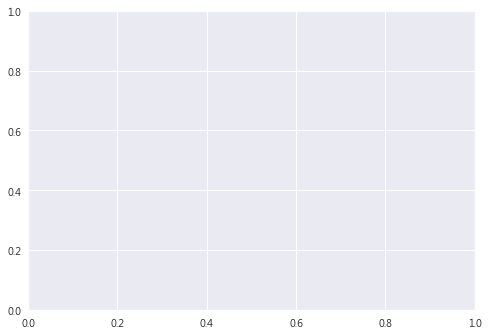

In [472]:
evaluate_model(lr)

In [38]:
# create_model?

In [131]:
tuned_xgboost = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5714,0.5833,0.7500,0.6000,0.6667,0.0870
1,0.7143,0.6667,1.0000,0.6667,0.8000,0.3636
2,0.5714,0.3333,0.7500,0.6000,0.6667,0.0870
3,0.7143,0.4167,1.0000,0.6667,0.8000,0.3636
4,0.5714,0.5833,0.7500,0.6000,0.6667,0.0870
5,0.2857,0.2500,0.5000,0.4000,0.4444,-0.5217
6,0.5714,0.6667,0.5000,0.6667,0.5714,0.1600
7,0.5000,0.3750,0.7500,0.6000,0.6667,-0.2857
8,0.8333,0.6250,1.0000,0.8000,0.8889,0.5714
9,0.3333,0.6250,0.2500,0.5000,0.3333,-0.2000


In [132]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# TFIDF

In [18]:
# data1 = data.copy()

In [127]:
df

0        False
1        False
3        False
4        False
5        False
         ...  
34222    False
34223    False
34225    False
34226    False
34227     True
Name: 強友, Length: 8879, dtype: bool

In [129]:
data = df.copy()

In [130]:
data1 = data[data['signal']==1]
data0 = data[data['signal']==0]

In [131]:
corpus = []
for i in data0['seg']:
    corpus.append(" ".join(i))

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

# corpus = ["welcome to stackoverflow my friend",  "my friend, don't worry, you can get help from stackoverflow"]
# corpus = np.array(data['remainder_sentence'].apply(lambda x:np.array(x)))
corpus
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(corpus)
# print(matrix)

In [133]:
print (matrix.shape)

(4270, 21443)


In [134]:
words = vectorizer.get_feature_names()
# for i in range(len(corpus)):
#     print ('----Document {}----'.format(i))
#     for j in range(len(words)):
#         if matrix[i,j] > 1e-5:
#               print (words[j].encode('utf-8'), matrix[i,j])
#                  print (words[j], matrix[i,j])

In [135]:
matrix.toarray().shape

(4270, 21443)

In [136]:
a = pd.DataFrame(matrix.toarray()).sum()

In [137]:
a

0        5.936133
1        9.190183
2        0.324514
3        0.074008
4        0.185168
           ...   
21438    0.180027
21439    0.097386
21440    0.252324
21441    0.467675
21442    0.498422
Length: 21443, dtype: float64

In [138]:
a = pd.DataFrame(matrix.toarray()).sum()
b = a.sort_values(ascending=False)[:50]

In [139]:
word_list=[]

for i in b.index:
    word_list.append(words[i])

word_list

['基金',
 '配息',
 '投資',
 '美元',
 'com',
 '謝謝',
 '應該',
 'https',
 'fbi',
 '強友',
 'fundhot',
 '淨值',
 'php',
 '市場',
 '大大',
 '南非幣',
 '強大',
 '可能',
 '感謝',
 '台幣',
 '沒有',
 '美股',
 'news',
 '指數',
 '績效',
 '美國',
 '現在',
 '比較',
 '目前',
 '檔案',
 '真的',
 '時間',
 '附加',
 '新興',
 '標的',
 '10',
 '中國',
 '看到',
 '匯率',
 '分享',
 '資產',
 'viewtopic',
 '銀行',
 'forum',
 '已經',
 '問題',
 '報酬率',
 '股票',
 '不會',
 '出現']

In [140]:
word_list_pos = word_list

In [141]:
word_list_neg = word_list

In [142]:
posword = [i for i in word_list_pos if i not in word_list_neg]

In [143]:
negword = [i for i in word_list_neg if i not in word_list_pos]

In [144]:
word_list = negword+posword

In [145]:
word_list

[]

In [146]:
sub_data=data.copy()

In [147]:
reg_data = pd.DataFrame()

for i in word_list:
    df = sub_data['remainder_sentence'].apply(lambda x: i in x)
    df = df.rename(i)
    reg_data = pd.concat([reg_data, df], axis=1)

reg_data=pd.concat([reg_data, sub_data['signal']] , axis=1)
reg_data['signal'] = reg_data['signal'].astype(int)


In [148]:
reg_data.columns

Index(['signal'], dtype='object')

In [114]:
reg_data = reg_data.drop(["04",'02','07','06','03','19','21','18'],axis=1)

In [115]:
reg_data

,交易,操作,獲利,分析,比較,其實,經濟,最近,反彈,美股,疫情,公園,一直,停損,看到,存股,signal
25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
32,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,0
77,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,0
86,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0
92,False,False,False,True,True,True,False,False,False,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32535,False,False,True,True,True,False,False,True,True,False,True,False,False,True,False,False,1
32543,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,True,1
32549,False,True,False,False,False,False,False,False,True,True,True,False,False,False,False,False,1
32563,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,1


In [194]:
# word_list

In [187]:
word_list

[181,
 1727,
 231,
 96,
 1185,
 37,
 60,
 1192,
 1996,
 573,
 1753,
 1992,
 5,
 1475,
 1965,
 1090,
 933,
 2137,
 1887,
 900,
 472,
 2081,
 371,
 6,
 537,
 665,
 1368,
 625,
 1031,
 1711,
 1199,
 2167,
 1492,
 2159,
 2071,
 13,
 442,
 760,
 1503,
 445,
 1792,
 899,
 8,
 558,
 1922,
 2180,
 960,
 529,
 1361,
 313]

In [197]:
reg_data = pd.DataFrame()

In [198]:
for i in word_list:
    df = sub_data['remainder_sentence'].apply(lambda x: i in x)
    df = df.rename(i)
    reg_data = pd.concat([reg_data, df], axis=1)

In [199]:
reg_data

,5566,編輯,epson,2019,整理,118,166,數據,資產,利率,...,股票,已經,06,分析,認為,長期,影響,公司,殖利率,上市
8104,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
9278,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
10252,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
10515,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
10997,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
27593,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,False,False
28790,False,True,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
31885,False,True,False,False,True,False,False,True,False,False,...,False,True,True,True,False,True,True,False,False,False


In [58]:
sub_data = df[df['author']=='epson5566']

In [59]:
reg_data = pd.DataFrame()

for i in word_list:
    df = sub_data['remainder_sentence'].apply(lambda x: i in x)
    df = df.rename(i)
    reg_data = pd.concat([reg_data, df], axis=1)

reg_data=pd.concat([reg_data, sub_data['signal']] , axis=1)
reg_data['signal'] = reg_data['signal'].astype(int)


In [60]:
reg_data

,文章,04,經濟,其實,使用,06,就業,通膨,美股,影響,...,落在,目前,長期,上市,分析,未來,30,機制,美元,signal
9641,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,1
9796,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,1
9859,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,True,False,1
10000,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,1
10800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31897,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,False,False,False,1
31993,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,1
32082,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
32157,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,1


In [208]:
reg_data

,5566,編輯,epson,2019,整理,118,166,數據,資產,利率,...,已經,06,分析,認為,長期,影響,公司,殖利率,上市,signal
8104,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,1
9278,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,1
10252,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,1
10515,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,False,False,False,1
10997,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,1
27593,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,True,False,False,1
28790,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,0
31885,False,True,False,False,True,False,False,True,False,False,...,True,True,True,False,True,True,False,False,False,1


In [203]:
data['signal']

9641     True
9796     True
9859     True
10000    True
10800    True
         ... 
31897    True
31993    True
32082    True
32157    True
32510    True
Name: signal, Length: 96, dtype: bool

In [201]:
reg_data['signal'] = 

,5566,編輯,epson,2019,整理,118,166,數據,資產,利率,...,股票,已經,06,分析,認為,長期,影響,公司,殖利率,上市
8104,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
9278,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
10252,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
10515,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
10997,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
27593,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,False,False
28790,False,True,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
31885,False,True,False,False,True,False,False,True,False,False,...,False,True,True,True,False,True,True,False,False,False


In [116]:
exp_clf = setup(reg_data, target = 'signal')


 
Setup Succesfully Completed!


,Description,Value
0,session_id,491
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1998, 17)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,16
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [63]:
5

5

In [117]:
compare_models()

IntProgress(value=0, description='Processing: ', max=170)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:01:13
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 10
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.7404,0.6767,0.9718,0.7499,0.8465,0.0868
1,Ridge Classifier,0.7368,0.0000,0.9767,0.7452,0.8453,0.0578
2,Extreme Gradient Boosting,0.7353,0.6763,0.9534,0.7532,0.8415,0.1022
3,Ada Boost Classifier,0.7339,0.6813,0.9621,0.7486,0.8419,0.0762
4,Linear Discriminant Analysis,0.7339,0.6737,0.9553,0.7513,0.8409,0.0908
5,Gradient Boosting Classifier,0.7318,0.6726,0.9408,0.7553,0.8378,0.1119
6,Random Forest Classifier,0.7060,0.6039,0.8874,0.7562,0.8163,0.1003
7,SVM - Linear Kernel,0.6923,0.0000,0.8738,0.7561,0.7942,0.0581
8,Extra Trees Classifier,0.6910,0.5946,0.8660,0.7528,0.8051,0.0741
9,Decision Tree Classifier,0.6788,0.5527,0.8301,0.7574,0.7920,0.0932


LightGBMError: Do not support non-ASCII characters in feature name.

In [68]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7143,0.8333,1.0000,0.6667,0.8000,0.3636
1,0.1429,0.1667,0.2500,0.2500,0.2500,-0.7500
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.7143,0.4167,1.0000,0.6667,0.8000,0.3636
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8571,1.0000,1.0000,0.8000,0.8889,0.6957
6,0.7143,0.6667,1.0000,0.6667,0.8000,0.3636
7,0.6667,0.8750,0.7500,0.7500,0.7500,0.2500
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8333,0.7500,1.0000,0.8000,0.8889,0.5714


In [69]:
evaluate_model(lr)

,Parameters
C,1
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [ ]:
for line in  data['remainder_sentence']:
    corpus.append(line)

In [137]:
 data['remainder_sentence']

9641     [標的, 2330, 台積電\n, 分類, 空\n, 分析, 正文,    , 主力, 成本...
9796     [標的, 9955, 佳龍\n, 分類, 長期, 看多, 分析, 正文,    , 現在, ...
9859     [標的, 2330, 台積電\n, 分類, 空\n, 分析, 正文,    , 2017/7...
10000    [標的,  2330, 台積電\n, 分類, 分析, 正文,    , 預計, 三角, 收斂...
10800    [本來, 想, 查, 一下, 亞洲, 國, 美元, 儲備, 最少, 國家, 能不能, 襲擊,...
                               ...                        
31897    [個人, 觀察, 認為, 未來, 台股, 指數, 可能, 波動, 會, 變, 大\n, 主要...
31993    [真的, 語, 重心長, 千萬, 不要, 時機點, 入場, 做, 個人, 研判, 波, 反彈...
32082    [現在, 盤勢, 太, 想, 部位, 差不多, 建立好, 未來, 落底, 可能, 會, 出現...
32157    [公債, 1月期,  3月期, 兩, 天, 夜盤, 殖利率, 進入, 負值, 區域, 早盤,...
32510    [其實, ETF, 致命, 缺點, 這陣子, 已經, 完全, 看見, 蠻, 論點, ETF,...
Name: remainder_sentence, Length: 96, dtype: object

In [135]:
data['remainder_sentence']

9641     [標的, 2330, 台積電\n, 分類, 空\n, 分析, 正文,    , 主力, 成本...
9796     [標的, 9955, 佳龍\n, 分類, 長期, 看多, 分析, 正文,    , 現在, ...
9859     [標的, 2330, 台積電\n, 分類, 空\n, 分析, 正文,    , 2017/7...
10000    [標的,  2330, 台積電\n, 分類, 分析, 正文,    , 預計, 三角, 收斂...
10800    [本來, 想, 查, 一下, 亞洲, 國, 美元, 儲備, 最少, 國家, 能不能, 襲擊,...
                               ...                        
31897    [個人, 觀察, 認為, 未來, 台股, 指數, 可能, 波動, 會, 變, 大\n, 主要...
31993    [真的, 語, 重心長, 千萬, 不要, 時機點, 入場, 做, 個人, 研判, 波, 反彈...
32082    [現在, 盤勢, 太, 想, 部位, 差不多, 建立好, 未來, 落底, 可能, 會, 出現...
32157    [公債, 1月期,  3月期, 兩, 天, 夜盤, 殖利率, 進入, 負值, 區域, 早盤,...
32510    [其實, ETF, 致命, 缺點, 這陣子, 已經, 完全, 看見, 蠻, 論點, ETF,...
Name: remainder_sentence, Length: 96, dtype: object

# next step  for fundhot only

In [479]:
df = data_tw[data_tw.author=="fundhot"]

In [480]:
data = df.copy()
sub_data = data[['seg','signal']]

pos_dict = dict()
neg_dict = dict()
pos_signal=0
neg_signal=0

for seg, signal in zip(sub_data['seg'], sub_data['signal']):
    if signal==True:
        pos_signal = pos_signal+1
        
        for word in seg:
            if word in pos_dict:
                pos_dict[word] += 1
                break
            else:
                pos_dict[word] = 1 
    if signal==False:
        neg_signal = neg_signal+1
        
        for word in seg:
            if word in neg_dict:
                neg_dict[word] += 1
                break
            else:
                neg_dict[word] = 1 

pos_words  = pd.Series(pos_dict,index=pos_dict.keys())
pos_words = pos_words.rename('pos_words')
neg_words  = pd.Series(neg_dict,index=neg_dict.keys())
neg_words = neg_words.rename('neg_words')

worddata = pd.concat([pos_words, neg_words], axis=1)
worddata

print(pos_signal)
print(neg_signal)

worddata= worddata.fillna(0)
worddata

1088
1119


,pos_words,neg_words
"""",1019.0,1042.0
出清利安,1.0,0.0
越南,1.0,0.0
2.2%,1.0,0.0
基金,3.0,3.0
...,...,...
"""12",0.0,1.0
"""拉美",0.0,1.0
"""t",0.0,1.0
0129020,0.0,1.0


In [482]:

t_ratio=[]
pvalue=[]
for i in worddata.index:
    pos=[]
    neg=[]
    for seg, signal in zip(sub_data['seg'], sub_data['signal']):
        if signal==True:
            count_pos=0
            for word in seg:
                if word == i:
                    count_pos += 1
            pos.append(count_pos)

        if signal==False:
            count_neg=0
    
            for word in seg:
                if word ==i:
                    count_neg+= 1
            neg.append(count_neg)
    ratio, pval = stats.ttest_ind(pos, neg)
    t_ratio.append(ratio)
    pvalue.append(pval)

worddata_ttest = worddata.copy()
worddata_ttest['t-ratio']=t_ratio
worddata_ttest['p-value']=pvalue

worddata_ttest = worddata_ttest.drop(['pos_words', 'neg_words'], axis=1)

In [483]:
worddata_ttest['abs_tratio'] = abs(worddata_ttest['t-ratio'])
keyindex=worddata_ttest.sort_values('abs_tratio', ascending=False)[:80]
keyindex

,t-ratio,p-value,abs_tratio
重點,3.666639,0.000252,3.666639
http://forum,-2.772959,0.005602,2.772959
資料,-2.767964,0.005688,2.767964
高,2.760004,0.005828,2.760004
文,2.747500,0.006054,2.747500
...,...,...,...
"""Money",1.434889,0.151461,1.434889
造就,1.434889,0.151461,1.434889
處置,1.434889,0.151461,1.434889
"""C",1.434889,0.151461,1.434889


In [484]:
selected_words=keyindex.iloc[a].index
reg_data = pd.DataFrame()


for i in selected_words:
    df = sub_data['seg'].apply(lambda x: i in x)
    df = df.rename(i)
    reg_data = pd.concat([reg_data, df], axis=1)


reg_data=pd.concat([reg_data, sub_data['signal']] , axis=1)

reg_data['signal'] = reg_data['signal'].astype(int)


In [485]:
exp_clf = setup(reg_data, target = 'signal')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,618
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2207, 69)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,68
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [486]:
compare_models()

IntProgress(value=0, description='Processing: ', max=170)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:27:47
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.5525,0.0000,0.4008,0.5645,0.4670,0.1010
1,Ada Boost Classifier,0.5518,0.5818,0.3535,0.5722,0.4346,0.0985
2,Linear Discriminant Analysis,0.5505,0.5768,0.3968,0.5624,0.4632,0.0971
3,Logistic Regression,0.5466,0.5749,0.4008,0.5559,0.4636,0.0895
4,Gradient Boosting Classifier,0.5460,0.5786,0.3430,0.5637,0.4235,0.0867
5,Naive Bayes,0.5401,0.5875,0.1143,0.7300,0.1947,0.0691
6,Extreme Gradient Boosting,0.5369,0.5617,0.3325,0.5482,0.4119,0.0684
7,SVM - Linear Kernel,0.5304,0.0000,0.5670,0.6466,0.4342,0.0605
8,K Neighbors Classifier,0.5253,0.5353,0.4391,0.5302,0.4707,0.0491
9,Quadratic Discriminant Analysis,0.5252,0.5593,0.0999,0.6536,0.1691,0.0389


LightGBMError: Do not support non-ASCII characters in feature name.

In [487]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5935,0.6275,0.4156,0.6400,0.5039,0.1852
1,0.5032,0.4887,0.3158,0.4898,0.3840,-0.0007
2,0.5161,0.5701,0.4342,0.5077,0.4681,0.0292
3,0.5484,0.5625,0.3421,0.5652,0.4262,0.0896
4,0.5065,0.5073,0.4079,0.5000,0.4493,0.0105
5,0.5649,0.5846,0.4474,0.5763,0.5037,0.1272
6,0.5779,0.5930,0.5000,0.5846,0.5390,0.1541
7,0.5649,0.6245,0.4474,0.5763,0.5037,0.1272
8,0.5130,0.5169,0.2895,0.5116,0.3697,0.0204
9,0.5779,0.6736,0.4079,0.6078,0.4882,0.1521


In [488]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [489]:
ada = create_model('ada')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5935,0.6292,0.3766,0.6591,0.4793,0.1848
1,0.5226,0.5271,0.3026,0.5227,0.3833,0.0371
2,0.5355,0.6011,0.3421,0.5417,0.4194,0.0641
3,0.5097,0.5311,0.3026,0.5000,0.3770,0.0116
4,0.5065,0.5075,0.3158,0.5000,0.3871,0.0081
5,0.5714,0.6003,0.3421,0.6190,0.4407,0.1378
6,0.5649,0.5841,0.4079,0.5849,0.4806,0.1263
7,0.5844,0.6272,0.4474,0.6071,0.5152,0.1659
8,0.5325,0.5346,0.2368,0.5625,0.3333,0.0578
9,0.5974,0.6759,0.4605,0.6250,0.5303,0.1919


In [490]:
evaluate_model(ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [491]:
rd = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6000,0.0,0.4286,0.6471,0.5156,0.1982
1,0.5097,0.0,0.3026,0.5000,0.3770,0.0116
2,0.5290,0.0,0.4342,0.5238,0.4748,0.0546
3,0.5613,0.0,0.3947,0.5769,0.4688,0.1170
4,0.5065,0.0,0.3947,0.5000,0.4412,0.0101
5,0.5649,0.0,0.4474,0.5763,0.5037,0.1272
6,0.5844,0.0,0.4868,0.5968,0.5362,0.1667
7,0.5779,0.0,0.4342,0.6000,0.5038,0.1527
8,0.5195,0.0,0.2895,0.5238,0.3729,0.0333
9,0.5714,0.0,0.3947,0.6000,0.4762,0.1389


In [492]:
evaluate_model(rd)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…